In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def adjacent_number(img, a):
    d = np.zeros((a.shape[0] + 1))
    for i in range(9):
        d[i] = 1 if abs(a[i]) == 1 else 0
    d[9] = 1 if abs(a[1]) == 1 else 0
    
    s = 0
    for k in range(1, 8, 2):
        s += (d[k] - d[k] * d[k+1] * d[k+2])
    return s

In [42]:
def hilditch_thinning(input_img):
    dy = [0,  0, -1, -1, -1,  0, +1, +1, +1]
    dx = [0, +1, +1,  0, -1, -1, -1,  0, +1]

    img = input_img.copy()
    H, W = img.shape
    neg_count = 1
    while neg_count > 0:
        neg_count = 0
        for iy in range(H):
            for ix in range(W):
                a = np.zeros((9))
                for k in range(9):
                    y = iy + dy[k]
                    x = ix + dx[k]
                    if 0 <= y < H and 0 <= x < W:
                        a[k] = img[y][x]

                # 図形要素であるか
                if not a[0] == 1:
                    continue

                # 境界点であるか
                s = 0
                for k in range(1, 8, 2):
                    s += (1 - abs(a[k]))
                if not s >= 1:
                    continue

                # 端点を削除しない
                s = 0
                for k in range(1, 9):
                    s += abs(a[k])
                if not s >= 2:
                    continue

                # 孤立点を保存する
                s = 0
                for k in range(1, 9):
                    if a[k] == 1: s += 1
                if not s >= 1:
                    continue

                # 連結性を保存する
                if not adjacent_number(img, a) == 1:
                    continue

                # 線幅 2 の線分の片側のみを削除
                s = 0
                for k in range(1, 9):
                    if a[k] != -1:
                        s += 1
                    else:
                        ak = a[k]
                        a[k] = 0
                        if adjacent_number(img, a) == 1: s += 1
                        a[k] = ak
                if not s == 8:
                    continue

                # 条件を全部満たした
                img[iy][ix] = -1
                neg_count += 1

        if neg_count != 0:
            for iy in range(H):
                for ix in range(W):
                    if img[iy][ix] == -1:
                        img[iy][ix] = 0
    
    return img

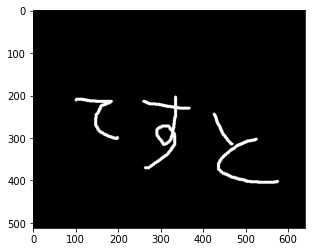

In [51]:
#  Gasyori100Knock にある例だとなぜかうまく行かない (多分 reference solution が元のアルゴリズムに忠実でない？)
#  代わりに https://github.com/eiichiromomma/CVMLAB/wiki/OpenCV-Thinning にある画像を使用

#  binarize
img = cv2.cvtColor(cv2.imread("../thinning_test.png"), cv2.COLOR_BGR2GRAY).astype(np.int8)
img[img < 0] = 1
plt.imshow(img, cmap="gray")
plt.show()

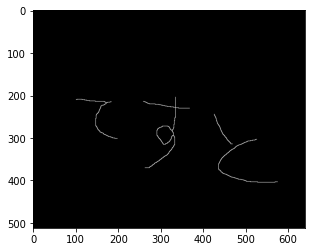

In [52]:
output_img = hilditch_thinning(img)
plt.imshow(output_img, cmap="gray")
plt.show()